####  Fire and Smoke Detection Model

Given images of fire and smoke, the task is to create a model that will accurately detect whether the given image is of fire or smoke

In [1]:
#importing important libraries

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
tf.__version__

'2.7.0'

## Data Augumentation 
#### - Creating more data from existing data

2 very important preprocessing steps are Resizing and Rescaling
* Rescale operation resizes an image by a given scaling factor.
* Resize serves the same purpose, but allows to specify an output image shape instead of a scaling factor.

In [12]:
batch_size = 16

training_datagenerator = ImageDataGenerator(rescale = 1./255, horizontal_flip=True, 
                               vertical_flip=True, shear_range=0.2, zoom_range=0.2, 
                                width_shift_range=0.2, height_shift_range=0.2, 
                                            validation_split=0.1)

ImageDataGenerator -
Generate batches of tensor image data with real-time data augmentation.

* rescale - rescaling factor. we multiply the data by the value provided
* horizontal_flip - Boolean. Randomly flip inputs horizontally. 
* vertical_flip - Boolean. Randomly flip inputs vertically. 
* shear_range - Float. Shear Intensity (Shear angle in counter-clockwise direction in degrees)
* zoom_range - Float or [lower, upper]. Range for random zoom.
* validation_split - Float. Fraction of images reserved for validation (strictly between 0 and 1)

In [13]:
# Dividing the data into training and validation,

train = training_datagenerator.flow_from_directory(r'C:\Users\Owner\python\Datasets\Training', 
                                target_size=(224,224), color_mode='rgb', class_mode = 'binary',
                                batch_size=batch_size, subset='training')

validation=training_datagenerator.flow_from_directory(r'C:\Users\Owner\python\Datasets\Training',
                                target_size=(224,224), color_mode='rgb',class_mode='binary', 
                                batch_size=batch_size, subset='validation')

Found 12350 images belonging to 2 classes.
Found 1372 images belonging to 2 classes.


flow_from_directory - Takes the path to a directory & generates batches of augmented data.

* target_size: The dimensions to which all images found will be resized.
* color_mode: "rgb", the images will be converted to have 3 channels.
* class_mode: Determines the type of label arrays that are returned:
            - "binary" will be 1D binary labels
* batch_size: Size of the batches of data.
* subset: Subset of data (`"training"` or `"validation"`) if
          `validation_split` is set in `ImageDataGenerator`.

### Making CNN Model

In [14]:
# Initializing CNN
cnn=tf.keras.models.Sequential()

# adding first layer
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',
                               input_shape=[224,224,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

# adding second layer
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

# adding third layer
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

# Flattening
cnn.add(tf.keras.layers.Flatten())

# Fully connected layer
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))

# Output layers
cnn.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

models.Sequential() - input -> hidden layers -> output


In [15]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 56, 56, 256)       147712    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 28, 28, 256)     

In [19]:
# To save the model
checkpoint = tf.keras.callbacks.ModelCheckpoint(r'C:\Users\Owner\python\Datasets\Fire_and_smoke_detection_model.h5',
                                monitor='val_loss',mode="min", save_best_only=True)
callbacks = checkpoint

In [20]:
cnn.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

cnn.fit_generator(train,validation_data=validation,epochs=1,
                  steps_per_epoch=train.samples//batch_size,
                  validation_steps=validation.samples//batch_size,
                  callbacks=callbacks 
                 )

<ipython-input-20-7e5d21895a19>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  cnn.fit_generator(train,validation_data=validation,epochs=1,


771/771 [==============================] - 1850s 2s/step - loss: 0.0347 - accuracy: 0.9908 - val_loss: 0.0024 - val_accuracy: 0.9993


### Testing the model

In [21]:
from tensorflow.keras.models import load_model            # to load our trained model

In [34]:
cnn = load_model(r'C:\Users\Owner\python\Datasets\Fire_and_smoke_detection_model.h5')

In [24]:
#importing imporatant libraries
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import PIL

In [65]:
# picking image for testing manually
testing_image = r'C:\Users\Owner\python\Datasets\Testing\fire\000122.jpg'

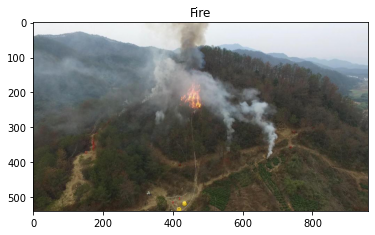

In [66]:
# Preprocessing the test image
# the test image should be of same shape as we took in training - i.e. resize it
# and convert it into array
# we need to rescale it

test_image = image.load_img(testing_image,target_size=(224,224))
test_image = image.img_to_array(test_image)
test_image = test_image/255
test_image = np.expand_dims(test_image,axis=0)

#Predicting the class of the image
result = cnn.predict(test_image)

Catagories=['Fire','Smoke']

image_show = PIL.Image.open(testing_image)


plt.title(Catagories[int(result[0][0])])
plt.imshow(image_show)